In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # 데이터 불러오기
X_scaled =  X_train.reshape(-1, 28, 28, 1) / 255.0 # 4차원 데이터 변환
train_input, val_input, train_target, val_target = train_test_split(X_scaled, y_train, test_size=0.2) 

In [2]:
model = keras.Sequential() # 스펠링 잘 기억하고
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1))) # 32개의 커널을 가진 층(input_shape지정)
model.add(keras.layers.MaxPooling2D(2)) # maxpooling 사용
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) # 또 반복
model.add(keras.layers.MaxPooling2D(2)) # 반복반복반복반복

c:\Users\dlwns\Desktop\Study\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:
model.add(keras.layers.Flatten()) # Flatten 층
model.add(keras.layers.Dense(100, activation='relu')) # 계속매우많이반복
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax')) # label 갯수가 10개 --> softmax function에서 label개수가 10개

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

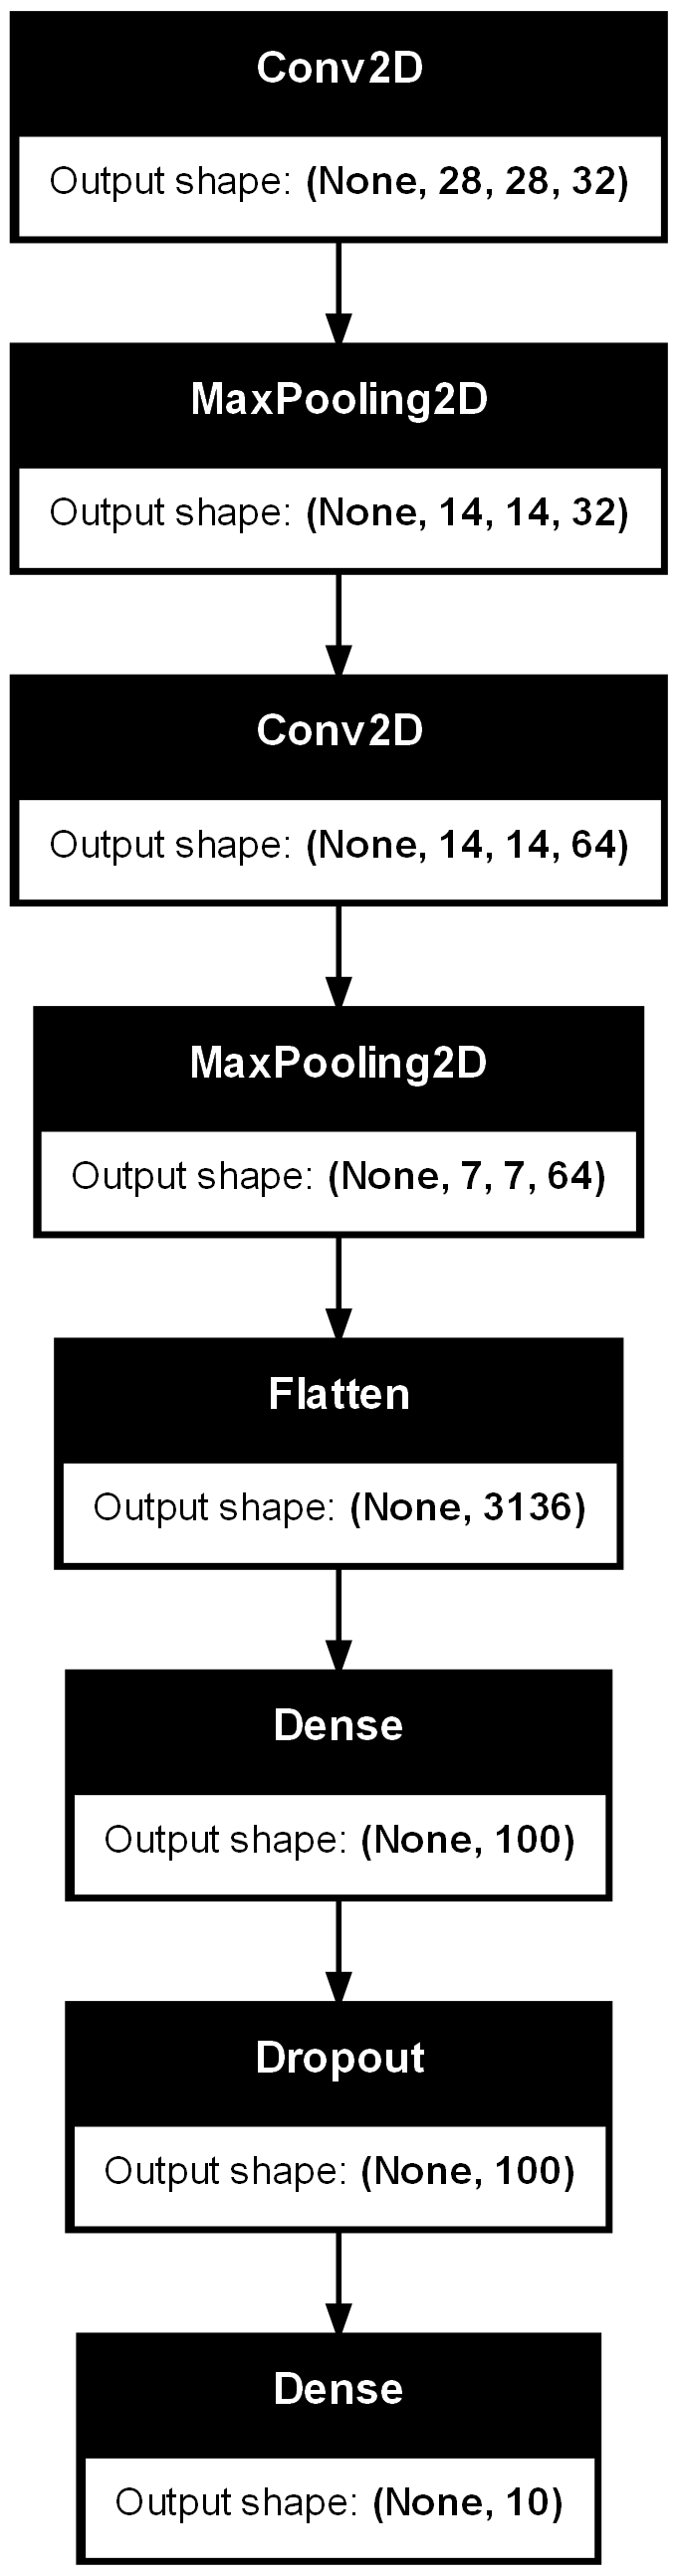

In [16]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras')
earlystopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, validation_data=(val_input, val_target), callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7547 - loss: 0.6806 - val_accuracy: 0.8907 - val_loss: 0.3099
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8787 - loss: 0.3328 - val_accuracy: 0.9007 - val_loss: 0.2723
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8981 - loss: 0.2845 - val_accuracy: 0.9112 - val_loss: 0.2400
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9110 - loss: 0.2432 - val_accuracy: 0.9168 - val_loss: 0.2330
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9222 - loss: 0.2177 - val_accuracy: 0.9171 - val_loss: 0.2256
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9278 - loss: 0.1940 - val_accuracy: 0.9165 - val_loss: 0.2255
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9363 - loss: 0.1745 - val_accuracy: 0.9208 - val_loss: 0.2182
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9395 - loss: 0

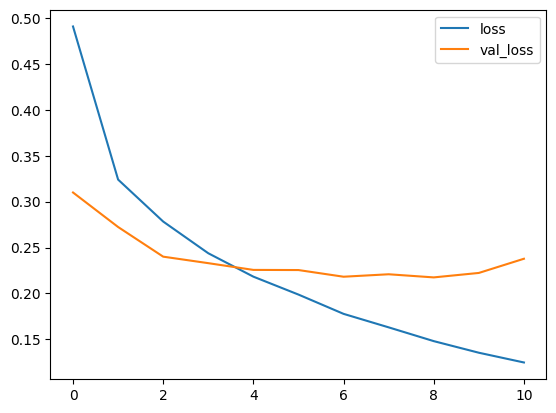

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [8]:
model.evaluate(val_input, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9232 - loss: 0.2199


[0.21745699644088745, 0.9264166951179504]

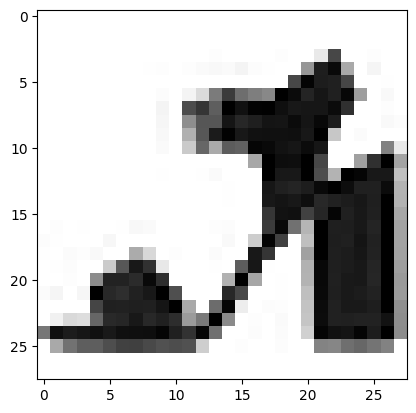

In [9]:
plt.imshow(train_input[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [10]:
preds = model.predict(val_input[:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[2.5002118e-09 1.0000000e+00 1.4904209e-13 3.6139149e-12 5.8241154e-18
  1.7564605e-16 5.8037182e-12 9.1113569e-24 4.1185460e-16 5.4077383e-17]]


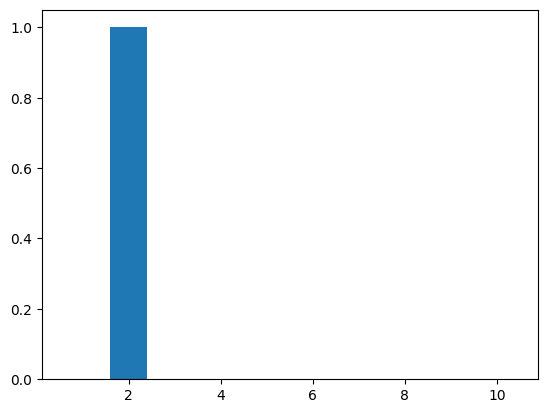

In [11]:
plt.bar(range(1, 11), preds[0])
plt.show()

In [12]:
classes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

import numpy as np
print(classes[np.argmax(preds)])

2


In [13]:
test_scaled = X_test.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9148 - loss: 0.2598


[0.2532806396484375, 0.9136999845504761]

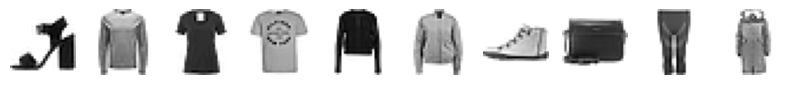

In [14]:
fig, axs = plt.subplots(1, 10, figsize=(10, 3))

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()

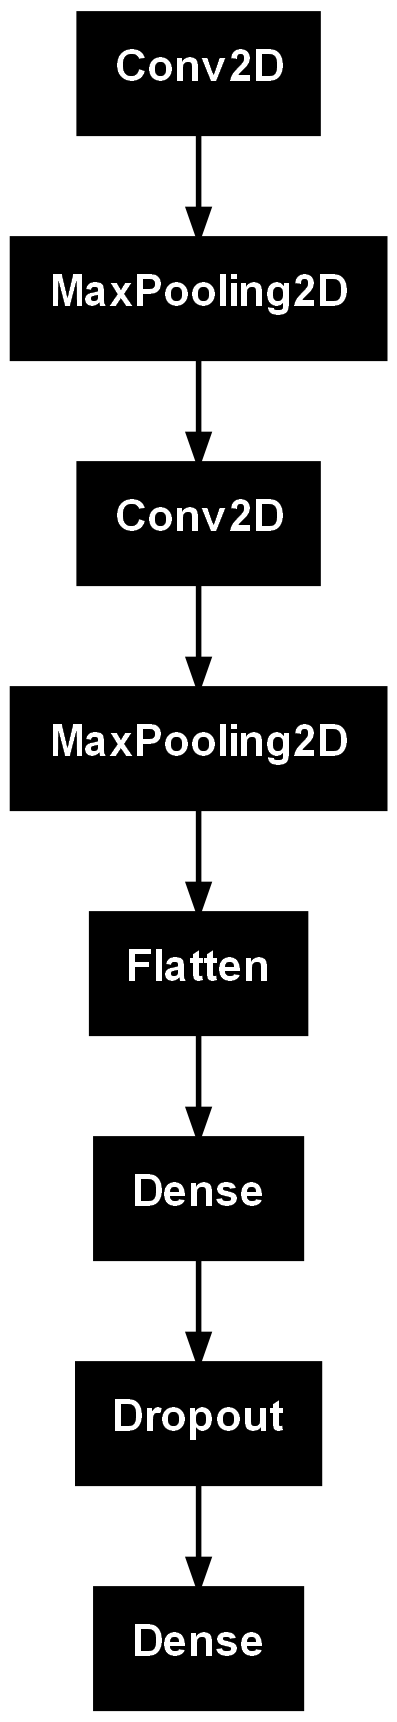

In [15]:
keras.utils.plot_model(model)